In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Acquiring and combining Data

In [2]:
demographic_data = pd.read_csv('DemographicData.csv')

In [3]:
demographic_data.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group
0,Aruba,ABW,10.244,78.9,High income
1,Afghanistan,AFG,35.253,5.9,Low income
2,Angola,AGO,45.985,19.1,Upper middle income
3,Albania,ALB,12.877,57.2,Upper middle income
4,United Arab Emirates,ARE,11.044,88.0,High income


In [4]:
fertility_rate = pd.read_csv('FertilityRate.csv')

In [5]:
fertility_rate.head()

,Country Name,Country Code,Region,Year,Fertility Rate
0,Aruba,ABW,The Americas,1960,4.820
1,Afghanistan,AFG,Asia,1960,7.450
2,Angola,AGO,Africa,1960,7.379
3,Albania,ALB,Europe,1960,6.186
4,United Arab Emirates,ARE,Middle East,1960,6.928


In [6]:
query = (fertility_rate['Year'] == 2013)
fertility_rate = fertility_rate[query]

In [7]:
fertility_rate.head()

,Country Name,Country Code,Region,Year,Fertility Rate
187,Aruba,ABW,The Americas,2013,1.669
188,Afghanistan,AFG,Asia,2013,5.050
189,Angola,AGO,Africa,2013,6.165
190,Albania,ALB,Europe,2013,1.771
191,United Arab Emirates,ARE,Middle East,2013,1.801


In [8]:
economic_data = pd.merge(demographic_data, fertility_rate, on='Country Code')

In [9]:
economic_data.head()

,Country Name_x,Country Code,Birth rate,Internet users,Income Group,Country Name_y,Region,Year,Fertility Rate
0,Aruba,ABW,10.244,78.9,High income,Aruba,The Americas,2013,1.669
1,Afghanistan,AFG,35.253,5.9,Low income,Afghanistan,Asia,2013,5.050
2,Angola,AGO,45.985,19.1,Upper middle income,Angola,Africa,2013,6.165
3,Albania,ALB,12.877,57.2,Upper middle income,Albania,Europe,2013,1.771
4,United Arab Emirates,ARE,11.044,88.0,High income,United Arab Emirates,Middle East,2013,1.801


In [10]:
economic_data = economic_data.drop(['Country Name_y', 'Year'], axis=1)
economic_data.head()

,Country Name_x,Country Code,Birth rate,Internet users,Income Group,Region,Fertility Rate
0,Aruba,ABW,10.244,78.9,High income,The Americas,1.669
1,Afghanistan,AFG,35.253,5.9,Low income,Asia,5.050
2,Angola,AGO,45.985,19.1,Upper middle income,Africa,6.165
3,Albania,ALB,12.877,57.2,Upper middle income,Europe,1.771
4,United Arab Emirates,ARE,11.044,88.0,High income,Middle East,1.801


In [11]:
economic_data.to_csv('economic_data.csv', index=False)

In [12]:
economic_data.columns

Index(['Country Name_x', 'Country Code', 'Birth rate', 'Internet users',
       'Income Group', 'Region', 'Fertility Rate'],
      dtype='object')

In [13]:
economic_data.columns = ['Country Name', 'Country Code', 'Birth rate', 'Internet users', 'Income Group', 'Region', 'Fertility Rate']

In [14]:
economic_data.head()

,Country Name,Country Code,Birth rate,Internet users,Income Group,Region,Fertility Rate
0,Aruba,ABW,10.244,78.9,High income,The Americas,1.669
1,Afghanistan,AFG,35.253,5.9,Low income,Asia,5.050
2,Angola,AGO,45.985,19.1,Upper middle income,Africa,6.165
3,Albania,ALB,12.877,57.2,Upper middle income,Europe,1.771
4,United Arab Emirates,ARE,11.044,88.0,High income,Middle East,1.801


### Visualization

<AxesSubplot:>

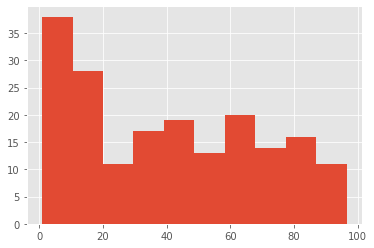

In [15]:
economic_data['Internet users'].hist()

<AxesSubplot:ylabel='Frequency'>

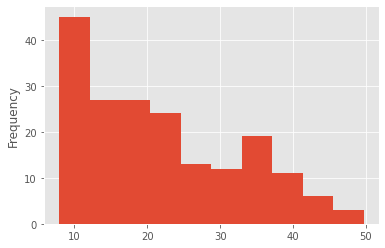

In [16]:
economic_data['Birth rate'].plot.hist()

<AxesSubplot:>

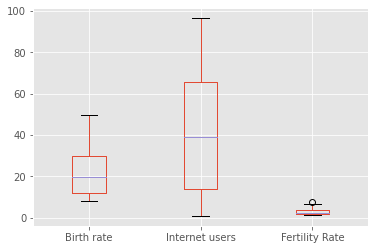

In [17]:
economic_data.boxplot()

In [18]:
economic_data.describe()

,Birth rate,Internet users,Fertility Rate
count,187.000000,187.000000,187.000000
mean,21.714128,40.944448,2.845543
std,10.668159,28.882503,1.428171
min,7.900000,0.900000,1.124000
25%,12.164500,13.950000,1.770500
50%,19.842000,39.000000,2.335000
75%,30.015000,65.627400,3.790000
max,49.661000,96.546800,7.623000
